In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_df = pd.read_csv('AAPL_train.csv', index_col='Date')
test_df = pd.read_csv('AAPL_test.csv', index_col='Date')

In [0]:
train_df = train_df.iloc[:, 0:1].values
test_df = test_df.iloc[:, 0:1].values

In [0]:
# Normalization of Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_df = scaler.fit_transform(train_df)
test_df = scaler.transform(test_df)

In [5]:
print(train_df[:5])
print(test_df[:5])

[[-1.76811056]
 [-1.77166908]
 [-1.82038926]
 [-1.8278577 ]
 [-1.83576534]]
[[2.14817675]
 [2.11342666]
 [2.02978076]
 [2.01717271]
 [2.08605727]]


In [6]:
np.mean(test_df)

2.2757639069880526

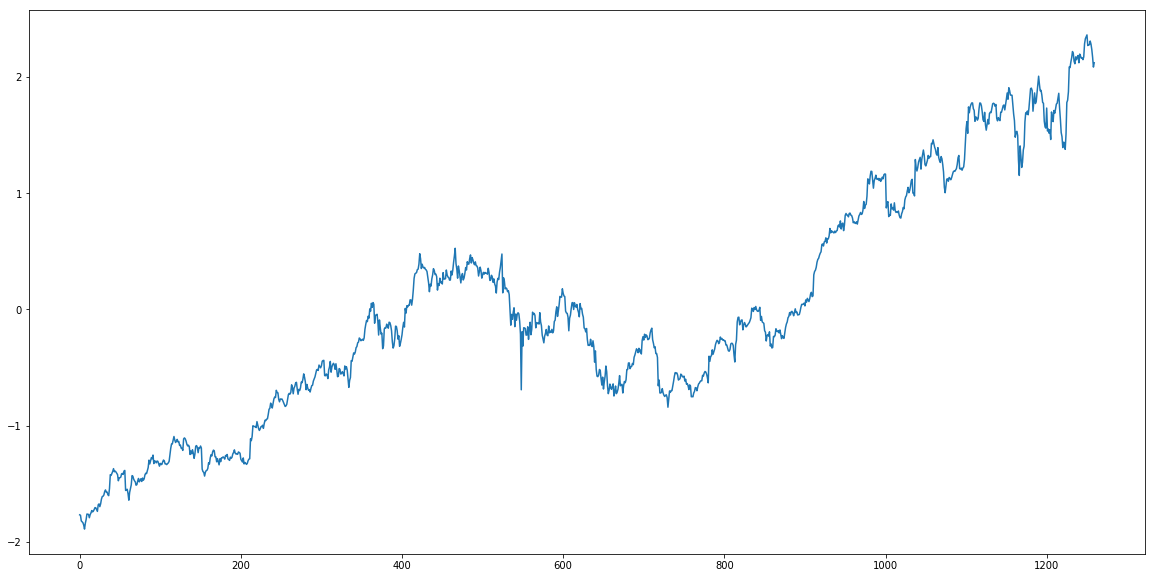

In [7]:
plt.figure(figsize=(20,10))
plt.plot(train_df)

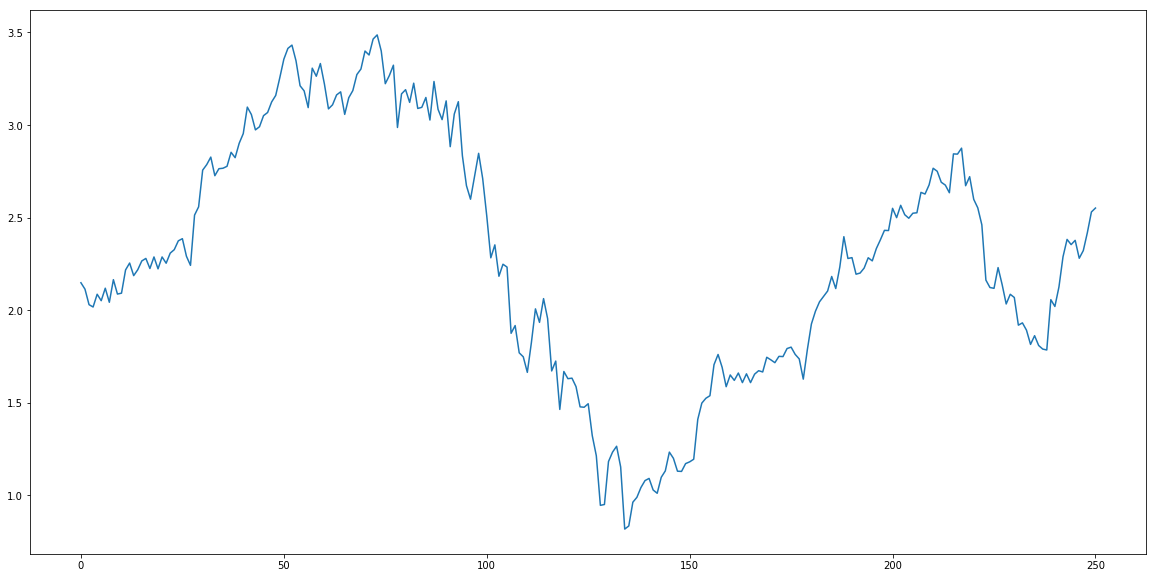

In [8]:
plt.figure(figsize=(20,10))
plt.plot(test_df)

In [0]:
# Dataset parameter is a numpy array

def to_supervised(dataset):
  
  X, y = list(), list()
  window_size = 60
  
  for i in range(dataset.shape[0]-window_size):
    X.append(list(dataset[i:i+60]))
    y.append(dataset[i+60])
    
  return X, y

In [10]:
X_train, y_train = to_supervised(train_df)
print(len(X_train))
print(len(y_train))

1200
1200


In [0]:
features, labels = np.array(X_train), np.array(y_train)

In [0]:
# Reshaping to 3d format (no_of_records, time_steps, features)

features_set = np.reshape(features, (features.shape[0], features.shape[1], 1))

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

Using TensorFlow backend.


In [14]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))

model.add(Dense(units = 1))  

model.compile(optimizer = 'adam', loss = 'mean_squared_error')  

W0621 16:38:40.154234 140094983980928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 16:38:40.177607 140094983980928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 16:38:40.182308 140094983980928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 16:38:40.349515 140094983980928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0621 16:38:40.360075 

In [15]:
# Fitting the model

model.fit(features_set, labels, epochs = 100, batch_size = 32)

W0621 16:38:47.771872 140094983980928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0621 16:38:50.097060 140094983980928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1200/1200 [==============================] - 17s 14ms/step - loss: 0.1892
Epoch 2/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0452
Epoch 3/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0374
Epoch 4/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0370
Epoch 5/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0346
Epoch 6/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0308
Epoch 7/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0314
Epoch 8/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0305
Epoch 9/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0273
Epoch 10/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0293
Epoch 11/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0268
Epoch 12/100
1200/1200 [============================

In [0]:
# Save model and architecture to single file

model.save("model.h5")

In [0]:
# Load model

from keras.models import load_model
model = load_model('model.h5')

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [18]:
from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

# And now to load...
# scaler = joblib.load(scaler_filename)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['scaler.save']

In [0]:
total_df = np.concatenate((train_df, test_df), axis=0)

In [20]:
print(train_df.shape)
print(test_df.shape)
print(total_df.shape)

(1260, 1)
(251, 1)
(1511, 1)


In [21]:
total_df[:5]

array([[-1.76811056],
       [-1.77166908],
       [-1.82038926],
       [-1.8278577 ],
       [-1.83576534]])

In [0]:
test_inputs = total_df[len(total_df)-len(test_df)-60:]

In [0]:
t1, t2 = to_supervised(test_inputs)
len(t1[0])
len(t2[0])
t1, t2 = np.array(t1), np.array(t2)

In [0]:
# t_f = np.array(test_inputs)
# print(t_f.shape)
t_f = np.reshape(t1, (t1.shape[0], t1.shape[1], 1))
pr = model.predict(t1)
pr = scaler.inverse_transform(pr)

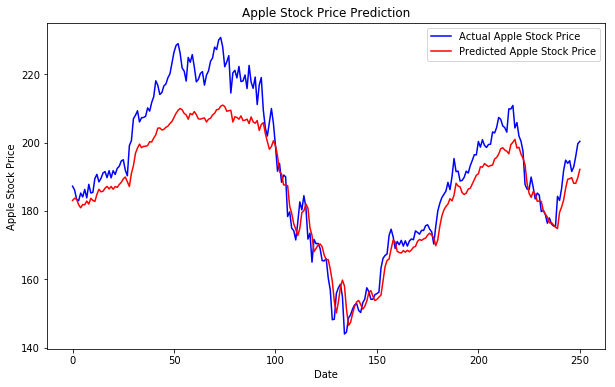

In [25]:
plt.figure(figsize=(10,6))  
plt.plot(scaler.inverse_transform(t2), color='blue', label='Actual Apple Stock Price')  
plt.plot(pr, color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show() 